## 2- Data Munging 
In this step, we will perform two main tasks.  
* **Dealing with missing values**    
During data collection, it is very common to face missing data problem, that can occur for many reasons (confidentiality, error,etc.). So, it is very important to understand those problems, in order to fill them using appropriate techniques before applying any Machine Learning algorithm.    


* **Dealing with outliers**     *
Outliers are those values that are far away from the normal values that can be observed in the whole data. They can introduce high bias in our final model performance, and can even lead us to taking wrong conclusion during the analysis step.   

#### A- Treating missing values   
We will use pandas **isnull()** function to look at all the missing values for each column.   
We are going to continue with the final dataframe we created from the **1_Data Aquisition** part. 

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('data/combined_data.csv')

In [3]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print('Output n° {}\n'.format(5))
print(df.isnull().sum())

Output n° 5

Age                  0
Workclass         2799
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-per-week       0
Country            857
Income               0
dtype: int64


To the left, we have the name of the features and the number of missing values to the right. We can see that:   
* **Workclass** has 1836 missing values   
* **Occupation** has 1843 missing values  
* **Country** has 583 missing values   

To deal with all the missing data, we couuld think of removing all the records (rows/observations) with those missing values. But, this technique could not be a better choice for our case, because we could lose much more data. To do so, we will use the following technique :  
* Replace missing data of categorical columns data with the mode value (most occuring category) of that column.   
* Replace missing numerical columns data with the median value of that column. Here we could use the mean instead of median, but the mean is very prompt to outliers (extreme values).     

To be able to identify which columns has which type, we can use pandas dtype() function.   



In [6]:
print(df.dtypes)

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
Hours-per-week     int64
Country           object
Income            object
dtype: object


To the left, we have the columns name, and their corresponding types to the right. So, we can see that the columns with missing values (discussed previously) are all categorical data (object).    
Then, we can have a look at all the distincs (unique) values in each columns with pandas **unique()** function.  

In [7]:
# Workclass  
print('Number of missing values: {}'.format(len(df['Workclass'].unique())))
print(df['Workclass'].unique())

Number of missing values: 9
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']


Workclass has 9 unique values including **nan** (missing value)

In [9]:
# Occupation  
print('Number of missing values: {}'.format(len(df['Occupation'].unique())))
print(df['Occupation'].unique())

Number of missing values: 15
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


The Occupation column has 15 unique values, including **nan** 

In [15]:
# Country  
print('Number of missing values: {}'.format(len(df['Country'].unique())))
print(df['Country'].unique())

Number of missing values: 41
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


The Country column has 42 unique values, including **nan** 

We know all the columns with missing values, and their types. We also have an idea of the unique values of each of those columns, now, we can perform the missing values replacement process.   

To do so, we will create a helper function that will perform this task for all the columns using python **statistics** built-in function.

In [11]:
import statistics as stat

In [12]:
def fill_categorical_missing(data, column):
    data.loc[data[column].isnull(), column] = stat.mode(data[column])

In [14]:
cols_to_fill = ['Workclass', 'Occupation', 'Country']

for col in cols_to_fill:
    fill_categorical_missing(df, col)

# Check the final data if there is any missing values 
print(df.isnull().sum())

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-per-week    0
Country           0
Income            0
dtype: int64


We can see that all the values to the right are equal to zero, which means that we have no missing values in our dataset.    

### B- Dealing with outliers  
To be able to identify outliers in our dataset, we will use **seaborn** **boxplot** to all our numerical columns, and show the final result with **matplotlib**'s **show()** function.    
We the help of the **Output n°6 (i.e print(df.dtypes))**, we can see all our numrical columns; But a better way to look at them is to apply pandas **describe** function, which gives more statistical information about all the numerical columns.  

In this part, we are going to use the copy of our training dataset for outliers analysis, then create a helper function that will finally be applied to the original training data for outliers removal.

In [16]:
# Create a copy of our data 
df_cp = df.copy()

In [17]:
df_cp.head() # check the 5 first rows.

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df_cp.describe()

,Age,fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


We have 6 numerical columns (Age to Hours-per-week). To the left, we have many statistical information such as :  
* **count**: for the total number of observation for each column.   
* mean: the mean value of each column   
* std: the standard deviation    
* 25%, 50% and 75% are quantiles. 

With the quantiles, min and max, the dataset can be splitted into 4 buckets:  
* Bucket 1: below 25% (e.g) for **Age** column, 25% of people are under **28 years old**.
* Bucket 2: between 25% and 50% (e.g), 25% of them (50%-25%) are between **28 and 37 years old**.  
* Bucket 3: between 50% and 75% (e.g), 25% of them are between **37 and 48 years old** .  
* Bucket 4: between above 75% (e.g), 25% of them are over **48 years old**.  

**Then all the values beyond 1.5xIQR are considered as outliers. ** 
IQR = Inter Quartile Range = 75th - 25th.   

This images gives a better understanding of a boxplot.   
![](https://www.researchgate.net/publication/318986284/figure/fig1/AS:525404105646080@1502277508250/Boxplot-with-outliers-The-upper-and-lower-fences-represent-values-more-and-less-than.png)

Then we will create a helper function that will remove all the outliers from our dataset. But, before that, let have a look at the boxplot.   

In [19]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

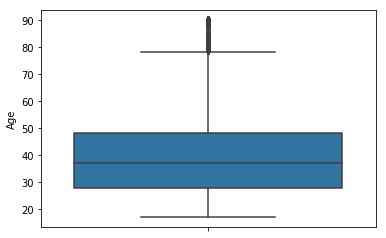

In [20]:
# Age 
sns.boxplot(y='Age', data=df_cp)
plt.show()

Let calculate 0-100th percentile to find a correct percentile value for removal of outliers. 

In [21]:
def ten_to_ten_percentiles(data, column):
    for i in range(0,100,10):
        var = data[column].values
        var = np.sort(var, axis=None)
        print('{} percentile value is {}'.format(i, var[int(len(var) * (float(i)/100))]))
    print('100 percentile value is {}'.format(var[-1]))

In [22]:
ten_to_ten_percentiles(df_cp, 'Age')

0 percentile value is 17
10 percentile value is 22
20 percentile value is 26
30 percentile value is 30
40 percentile value is 33
50 percentile value is 37
60 percentile value is 41
70 percentile value is 45
80 percentile value is 51
90 percentile value is 58
100 percentile value is 90


We could see from the boxplot of Age that there is no extreme value. Then after checking with percentile values, we have a confirmation of our remark. 

In [23]:
#calculating column values at each percntile 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100
def percentiles_from_90(data, column):
    for i in range(90,100):
        var = data[column].values
        var = np.sort(var, axis=None)
        print('{} percentile value is {}'.format(i, var[int(len(var) * (float(i)/100))]))
    print('100 percentile value is {}'.format(var[-1]))

Going deeper with the percentile values, we can have more information. So, here is a function that will give us the percentile values for each values from 99 to 100 percentile. 

In [24]:
#calculating colunm values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
def percentiles_from_99(data, column):
    for i in np.arange(0.0, 1.0, 0.1):
        var =data[column].values
        var = np.sort(var,axis = None)
        print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
    print("100 percentile value is ",var[-1])

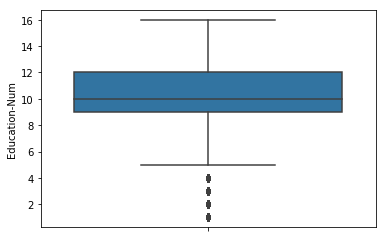

In [25]:
# Education-Num
sns.boxplot(y='Education-Num', data=df_cp)
plt.show()

In [26]:
ten_to_ten_percentiles(df_cp, 'Education-Num')

0 percentile value is 1
10 percentile value is 7
20 percentile value is 9
30 percentile value is 9
40 percentile value is 9
50 percentile value is 10
60 percentile value is 10
70 percentile value is 11
80 percentile value is 13
90 percentile value is 13
100 percentile value is 16


There is no anomalies with Education number.

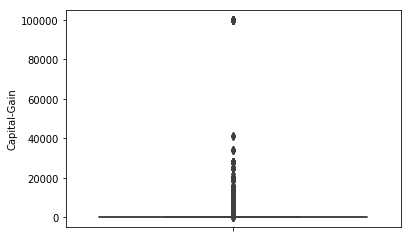

In [27]:
# Capital-Gain
sns.boxplot(y='Capital-Gain', data=df_cp)
plt.show()

In [28]:
ten_to_ten_percentiles(df_cp, 'Capital-Gain')

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 0
100 percentile value is 99999


In [29]:
percentiles_from_90(df_cp, 'Capital-Gain')

90 percentile value is 0
91 percentile value is 0
92 percentile value is 1151
93 percentile value is 2829
94 percentile value is 3674
95 percentile value is 5013
96 percentile value is 7298
97 percentile value is 7688
98 percentile value is 14084
99 percentile value is 15024
100 percentile value is 99999


In [30]:
percentiles_from_99(df_cp, 'Capital-Gain')

99.0 percentile value is 15024
99.1 percentile value is 15024
99.2 percentile value is 15831
99.3 percentile value is 20051
99.4 percentile value is 27828
99.5 percentile value is 41310
99.6 percentile value is 99999
99.7 percentile value is 99999
99.8 percentile value is 99999
99.9 percentile value is 99999
100 percentile value is  99999


In [31]:
# Removing the outliers based on 99.5th percentile of Capital-Gain
df_cp = df_cp[df_cp['Capital-Gain']<=34095]

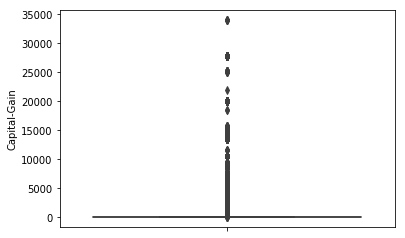

In [32]:
# Capital-Gain after removing outliers
sns.boxplot(y='Capital-Gain', data=df_cp)
plt.show()

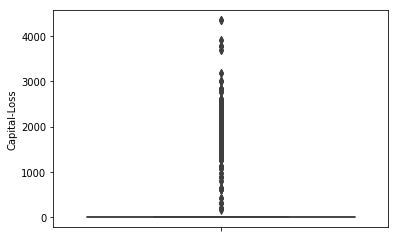

In [33]:
# Capital-Loss
sns.boxplot(y='Capital-Loss', data=df_cp)
plt.show()

In [34]:
ten_to_ten_percentiles(df_cp, 'Capital-Loss')

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 0
100 percentile value is 4356


In [35]:
percentiles_from_90(df_cp, 'Capital-Loss')

90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 0
94 percentile value is 0
95 percentile value is 0
96 percentile value is 1590
97 percentile value is 1848
98 percentile value is 1902
99 percentile value is 2001
100 percentile value is 4356


In [36]:
percentiles_from_99(df_cp, 'Capital-Loss')

99.0 percentile value is 2001
99.1 percentile value is 2002
99.2 percentile value is 2051
99.3 percentile value is 2179
99.4 percentile value is 2231
99.5 percentile value is 2258
99.6 percentile value is 2377
99.7 percentile value is 2415
99.8 percentile value is 2415
99.9 percentile value is 2559
100 percentile value is  4356


No special extreme value here as we could notice for Capital-Gain. 

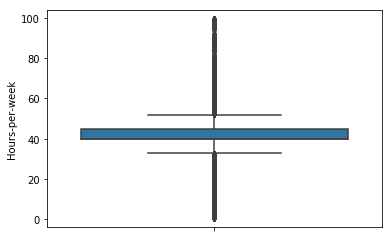

In [37]:
# Hours-per-week
sns.boxplot(y='Hours-per-week', data=df_cp)
plt.show()

In [38]:
ten_to_ten_percentiles(df_cp, 'Hours-per-week')

0 percentile value is 1
10 percentile value is 24
20 percentile value is 35
30 percentile value is 40
40 percentile value is 40
50 percentile value is 40
60 percentile value is 40
70 percentile value is 40
80 percentile value is 48
90 percentile value is 55
100 percentile value is 99


There is no special extreme value here. We could also see it from the boxplot.

Now, we are going to create a helper function in order to remove all the outliers, based in our previous univariate analysis.  

In [40]:
def remove_outliers(data):
    a = data.shape[0]
    print("Number of salary records = {}".format(a))
        
    temp_data = data[data['Capital-Gain']<=34095]
    b = temp_data.shape[0]
    
    print('Number of outliers from the Capital-Gain column= {}'.format(a - b))
        
    data = data[(data['Capital-Gain']<=34095)]
    
    print('Total outlies removed = {}'.format(a-b))
    print('-----'*10)
    return data

In [41]:
print('Removing all the outliers from the data')
print('-----'*10)
df_no_outliers = remove_outliers(df)

proportion_remaing_data = float(len(df_no_outliers)) / len(df)
print('Proportion of observation that remain after removing outliers = {}'.format(proportion_remaing_data))

Removing all the outliers from the data
--------------------------------------------------
Number of salary records = 48842
Number of outliers from the Capital-Gain column= 247
Total outlies removed = 247
--------------------------------------------------
Proportion of observation that remain after removing outliers = 0.9949428770320625


**Conclusion:** we finally have a dataset without ouliers and missing values. So we are going to save this in order to keep using the same dataset for the next step. 

In [44]:
df_no_outliers.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-per-week    0
Country           0
Income            0
dtype: int64

In [47]:
print("Saving the dataframe without outliers and missing values...")
df_no_outliers.to_csv('data/without_missing_outliers.csv', index=False)

Saving the dataframe without outliers and missing values...


**Go to the next step with 3_Exploratory-Data-Analysis.ipynb**